In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
df_col=["ID","Location","Target","Text"]
df = pd.read_csv('//content/drive/MyDrive/LUMINAR DATA SCIENCE/NLP/twitter_validation.csv',names=df_col)
df.head()

,ID,Location,Target,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [ ]:
df.isna().sum()

ID          0
Location    0
Target      0
Text        0
dtype: int64

In [ ]:
df["Target"].value_counts()

Target
Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: count, dtype: int64

In [ ]:

df.drop(df.index[(df["Target"]=="Irrelevant")],axis=0,inplace=True)
df["Target"].value_counts()

Target
Neutral     285
Positive    277
Negative    266
Name: count, dtype: int64

In [ ]:

df

,ID,Location,Target,Text
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.reset_index(drop=True,inplace=True) #droping the old index and assigning new index to that row
df

,ID,Location,Target,Text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
823,314,Amazon,Negative,Please explain how this is possible! How can t...
824,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
825,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
826,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.drop(["ID","Location"],axis=1,inplace=True)
df

,Target,Text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so it’s time to drink wine n play...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df["Target"]=df["Target"].map({"Positive":1,"Negative":-1,"Neutral":0})
df

,Target,Text
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so it’s time to drink wine n play...
826,1,Bought a fraction of Microsoft today. Small wins.


In [ ]:
tweets=df.Text
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp I’ve had Madeleine McCann in my cel...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so it’s time to drink wine n play...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: Text, Length: 828, dtype: object

In [ ]:
tweets=tweets.str.replace(r"[^a-zA-Z0-9]"," ")
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp I’ve had Madeleine McCann in my cel...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so it’s time to drink wine n play...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: Text, Length: 828, dtype: object

In [ ]:
tweets = tweets.str.replace(r"[^a-zA-Z0-9]", " ", regex=True)


tweets

0      I mentioned on Facebook that I was struggling ...
1      BBC News   Amazon boss Jeff Bezos rejects clai...
2       Microsoft Why do I pay for WORD when it funct...
3      CSGO matchmaking is so full of closet hacking ...
4      Now the President is slapping Americans in the...
                             ...                        
995       Toronto is the arts and culture capital of ...
996    tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997    Today sucked so it s time to drink wine n play...
998    Bought a fraction of Microsoft today  Small wins 
999    Johnson   Johnson to stop selling talc baby po...
Name: Text, Length: 1000, dtype: object

In [ ]:
from nltk.stem import SnowballStemmer
from nltk import TweetTokenizer


stemmer=SnowballStemmer("english")
tk=TweetTokenizer()

In [ ]:
tweets=tweets.apply(lambda x:[stemmer.stem(i.lower())for i in tk.tokenize(x)]).apply(lambda y:" ".join(y))

In [ ]:
tweets

0      i mention on facebook that i was struggl for m...
1      bbc news amazon boss jeff bezo reject claim co...
2      microsoft whi do i pay for word when it functi...
3      csgo matchmak is so full of closet hack it s a...
4      now the presid is slap american in the face th...
                             ...                        
995    toronto is the art and cultur capit of canada ...
996    this is actual a good move tot bring more view...
997    today suck so it s time to drink wine n play b...
998       bought a fraction of microsoft today small win
999    johnson johnson to stop sell talc babi powder ...
Name: Text, Length: 1000, dtype: object

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
sw=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
tweets = tweets.apply(lambda x:[i for i in tk.tokenize(x)if i not in sw]).apply(lambda x:" ".join(x))

In [ ]:
tweets.shape

(1000,)

In [ ]:
tweets

0      mention facebook struggl motiv go run day tran...
1      bbc news amazon boss jeff bezo reject claim co...
2      microsoft whi pay word function poor samsungus...
3           csgo matchmak full closet hack truli aw game
4      presid slap american face realli commit unlaw ...
                             ...                        
995    toronto art cultur capit canada wonder want st...
996    actual good move tot bring viewer one peopl go...
997    today suck time drink wine n play borderland s...
998            bought fraction microsoft today small win
999    johnson johnson stop sell talc babi powder u c...
Name: Text, Length: 1000, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
train_vec=vectorizer.fit_transform(tweets)
print(train_vec)

  (0, 739)	0.2456282916977699
  (0, 526)	0.2456282916977699
  (0, 3601)	0.19717097284763976
  (0, 883)	0.11802111433875656
  (0, 1060)	0.2456282916977699
  (0, 1189)	0.22139963227270484
  (0, 2091)	0.12503547156807654
  (0, 347)	0.2135997461023189
  (0, 912)	0.16343698819954885
  (0, 857)	0.2018385048310212
  (0, 2880)	0.2456282916977699
  (0, 612)	0.2456282916977699
  (0, 1919)	0.23145543449136263
  (0, 679)	0.2135997461023189
  (0, 417)	0.14270670271218175
  (0, 2392)	0.365996231282465
  (0, 581)	0.46291086898272527
  (1, 847)	0.4055823664694651
  (1, 3016)	0.4055823664694651
  (1, 2673)	0.3821800909185634
  (1, 1474)	0.4055823664694651
  (1, 3821)	0.36557591217188057
  (1, 2575)	0.3126902562590763
  (1, 3780)	0.26216072802580975
  (1, 2254)	0.24555654927912696
  :	:
  (825, 677)	0.22981061112100945
  (825, 1053)	0.2315686698425631
  (825, 3504)	0.21750175079084832
  (825, 3354)	0.2904718522758868
  (825, 2641)	0.17148706662740873
  (826, 1449)	0.5079831062080814
  (826, 3197)	0.4786

In [ ]:
train_vec.shape

(828, 3931)

In [ ]:
x = train_vec
y=df["Target"].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

**MODEL BUILDING**

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
svm_model=SVC()
nm_model=MultinomialNB()
rf_model=RandomForestClassifier()
ab_model=AdaBoostClassifier()

lst_model=[svm_model,nm_model,rf_model,ab_model]

In [ ]:
lst_model=[svm_model,nm_model,rf_model,ab_model]

In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [ ]:
print(y_train.shape)
print(y_test.shape)

(579,)
(249,)


SVC()
****************************************************************************************************
              precision    recall  f1-score   support

          -1       0.59      0.52      0.55        75
           0       0.50      0.70      0.58        84
           1       0.68      0.49      0.57        90

    accuracy                           0.57       249
   macro avg       0.59      0.57      0.57       249
weighted avg       0.59      0.57      0.57       249

****************************************************************************************************
MultinomialNB()
****************************************************************************************************
              precision    recall  f1-score   support

          -1       0.56      0.63      0.59        75
           0       0.57      0.55      0.56        84
           1       0.60      0.57      0.58        90

    accuracy                           0.58       249
   macro avg       0.5

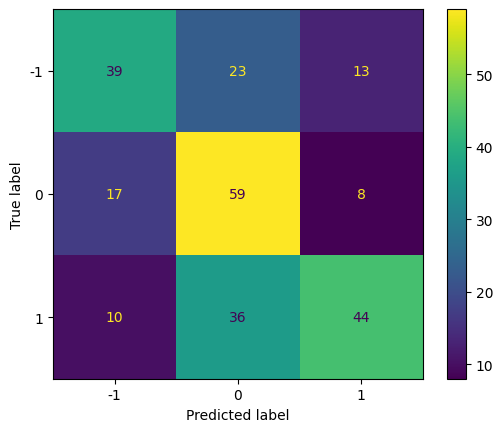

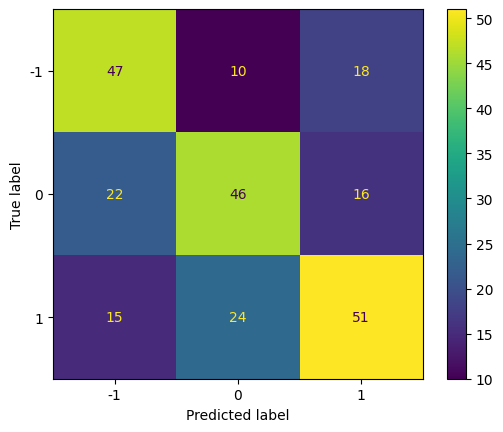

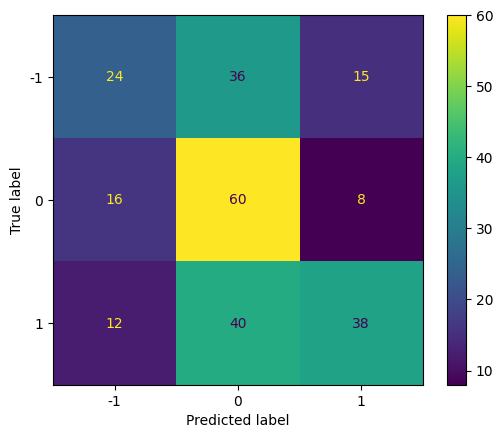

In [ ]:
for i in lst_model:
  print(i)
  i.fit(x_train,y_train)
  y_predict=i.predict(x_test)
  print("*"*100)
  print(classification_report(y_test,y_predict))
  print("*"*100)
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_predict))

Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. It answers the question: What proportion of positive identifications was actually correct?

Precision
=
True Positives (TP)
True Positives (TP)
+
False Positives (FP)
Precision=
True Positives (TP)+False Positives (FP)
True Positives (TP)
​

Recall (Sensitivity or True Positive Rate): Recall is the ratio of correctly predicted positive observations to all the observations in the actual class. It answers the question: What proportion of actual positives was identified correctly?

Recall
=
True Positives (TP)
True Positives (TP)
+
False Negatives (FN)
Recall=
True Positives (TP)+False Negatives (FN)
True Positives (TP)
​

F1-Score: The F1-score is the weighted average of Precision and Recall. It provides a balance between precision and recall, especially useful when you need a single metric that accounts for both false positives and false negatives.

F1-Score
=
2
×
Precision
×
Recall
Precision
+
Recall
F1-Score=2×
Precision+Recall
Precision×Recall
​

Support: Support is the number of actual occurrences of each class in the dataset. It gives context to the precision, recall, and F1-score.